### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [ ]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# read the dataset using pandas
data = pd.read_csv('student_scores.csv')

In [ ]:
data.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

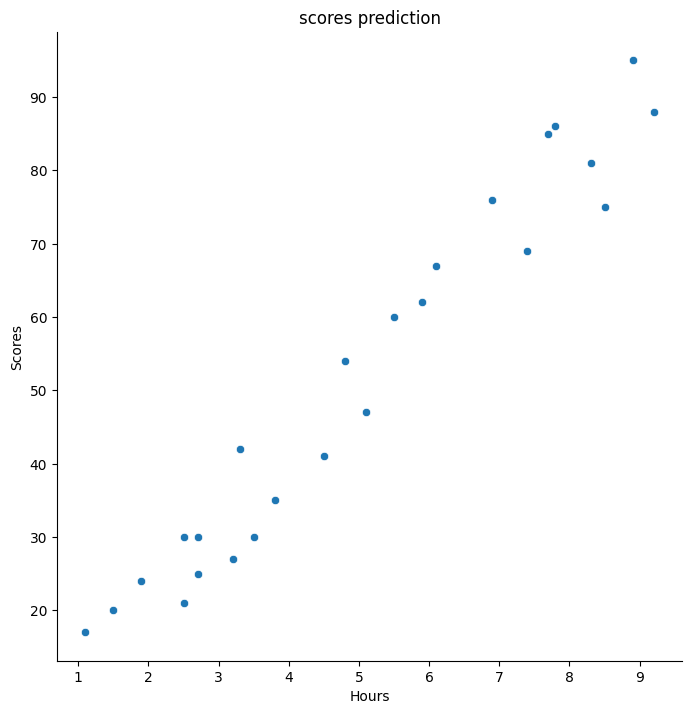

In [ ]:
plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('scores prediction')
plt.show()

In [ ]:
df = data.copy()

In [ ]:
#Check Duplicated Data
print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat:
(25, 2)


In [ ]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [ ]:
df = df.drop_duplicates()

In [ ]:
print("\nData Setelah Pemeriksaan Duplikat:")
print(df.shape)


Data Setelah Pemeriksaan Duplikat:
(25, 2)


In [ ]:
#Check missing value
df.isna().sum()

,0
Hours,0
Scores,0


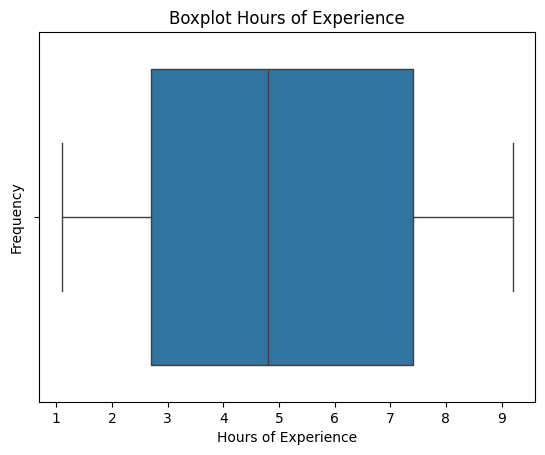

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours of Experience")
plt.ylabel("Frequency")  # Anda bisa menggunakan "Years of Experience" atau "Tahun Pengalaman"
plt.title("Boxplot Hours of Experience")

# Menampilkan plot
plt.show()

In [ ]:
# Experience of Hours data
X = data['Hours']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
# Scores data
y = data['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [ ]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
#Split the data for train and test
# train : test = 75 : 25 atau 80 : 20 atau 70:30 atau 85:15 , size train > test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

In [ ]:
X_train

,Hours
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5
20,2.7
17,1.9


In [ ]:
X_test


,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9
9,2.7
13,3.3


In [ ]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [ ]:
# Create new axis for x column in array
import numpy as np
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [ ]:
#array
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [ ]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
y_train


,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [ ]:
y_test


,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [ ]:
# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([52.02223727, 39.39391742, 17.05150538, 33.56546211, 46.19378196,
       88.93578761, 85.05015073, 36.47968977, 28.70841601, 20.93714226,
       49.10800962, 61.73632947, 78.25028619, 55.90787415, 77.27887697,
       13.1658685 , 74.36464932, 91.85001526])

In [ ]:
y_train

,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [ ]:
y_pred = lr_model.predict(X_test)


In [ ]:
X_test


array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
y_pred


array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

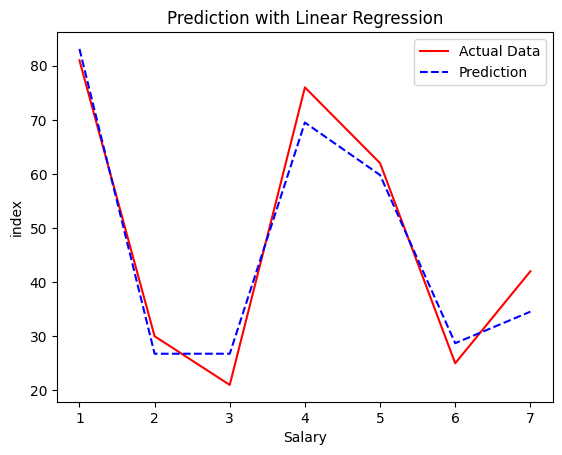

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [ ]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [ ]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9553509219739938


In [ ]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.4803670915057623
Coefficient of the line Linear Regression: [9.71409219]


Decision Tree Regressor Using another Machine Learning Model :

1.Decision Tree

2.Random Forest

In [ ]:
from sklearn.tree import DecisionTreeRegressor # mahasiswa B

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Predicting the Scores for the Test values
y_pred_dt = dt_model.predict(X_test) # soal uts maupun uas

In [ ]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

In [ ]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [ ]:
X_test


array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

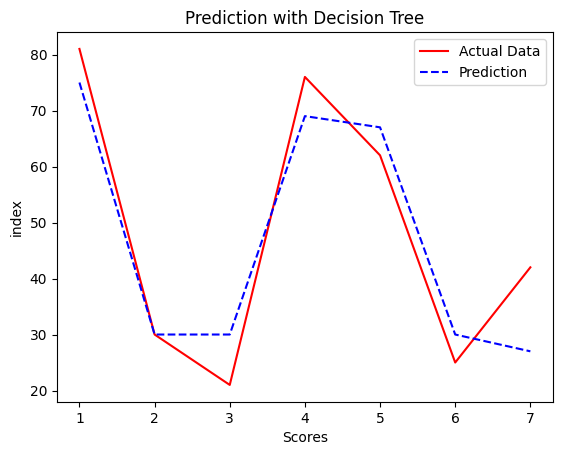

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [ ]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

In [ ]:
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.8803859268443893


Using random forest

In [2]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()

In [4]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)


NameError: name 'x_train' is not defined